In this notebook I will look at the power of SHAP Values

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

url = 'https://raw.githubusercontent.com/bvpotapenko/notebooks-collection/main/data/FIFA%202018%20Statistics.csv'
data = pd.read_csv(url)
y = (data['Man of the Match'] == "Yes") # This will convert from tet to binary
feature_names = [i for i in data.columns if data[i].dtype == np.int64]

X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

We get the SHAP values for all validation data with the following code. It is short enough that we explain it in the comments.

In [ ]:
!pip install shap

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


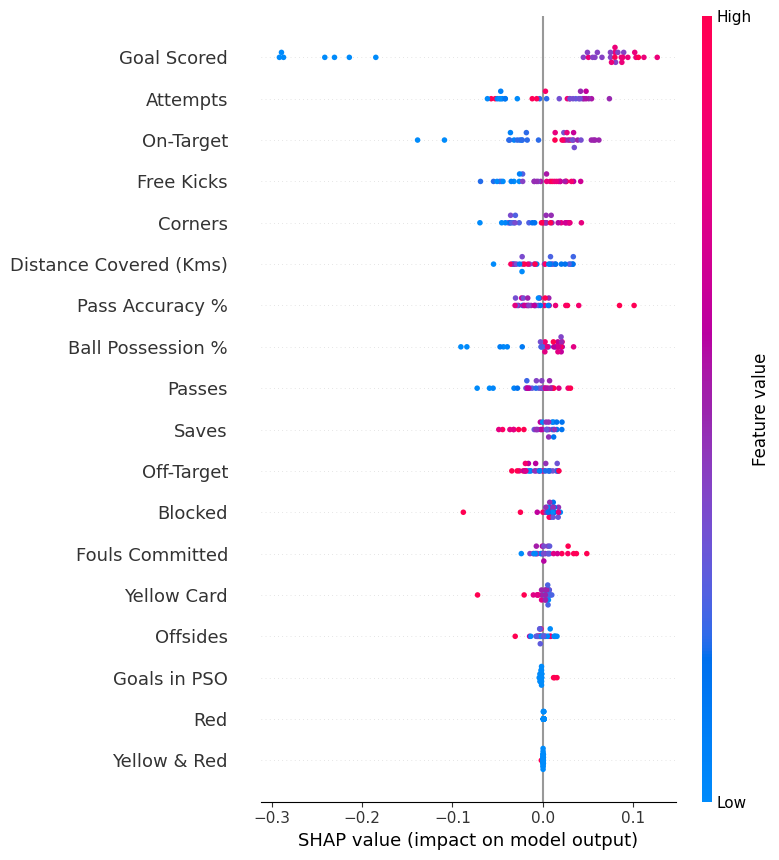

In [5]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], val_X)